# Neurona artificial

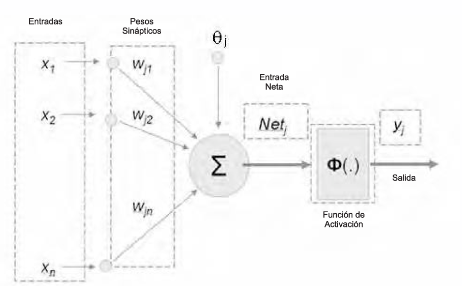

La neurona  recibe unas entradas de estímulo. La información que recibe la neurona la definimos con el vector de entradas $X= [x_1, x_2, ..., x_n]$.

La información recibida por la neurona es modificada por un vector $w$ de pesos sinápticos cuyo papel es el de emular la sinapsis. Estos valores pueden atenuar o amplificar los valores que se desean propagar hacia la neurona.

El parámetro θ_j se conoce como el bias o umbral de una neurona.

Los diferentes valores que recibe la neurona, modificados por los pesos sinápticos, los sumamos para producir lo que hemos denominado la entrada neta.

La activación o no de la neurona depende de lo que llamaremos Función de Activación. La entrada neta la evaluamos en esta función y obtenemos la salida de la red.

La salida $y_j$ de la neurona se genera al evaluar la entrada neta en la función de activación.


Matemáticamente, podemos ver el proceso de entrada neta así

$$ neto_j = \sum _{i=1} ^n x_i w_{ji} + \theta _j $$
$$ neto_j = x_1 w_{j1} + x_2 w_{j2} + ... + x_n w_{jn} + \theta _j $$

Y la salida de la neurona estara dada por

$$ y_j = \Phi _j (neto_j) $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio**

Crea una función que dadas las entradas y los parámetros, emule el funcionamiento de la neurona


In [45]:
def paso_binario(x):
    return np.where(x >= 0, 1, 0)

def calcular_neurona(entradas, pesos, bias, funcion_activacion):
#  Inserta codigo aqui
  suma = np.dot(entradas, pesos) + bias
  salida = funcion_activacion(suma)
  return salida

# Ejemplo de uso de la función
longitud_entrada = 5
entradas = np.random.rand(longitud_entrada)
pesos = np.random.rand(longitud_entrada)
bias = - np.random.rand()  
# bias = -2
funcion_activacion = paso_binario

y_j = calcular_neurona(entradas, pesos, bias, funcion_activacion)
y_j

array(1)

In [46]:
print(entradas)
print(bias)
print(pesos)

[0.23164941 0.16854387 0.03220278 0.17280961 0.38602691]
-0.21985287320739466
[0.05637244 0.15321464 0.91166358 0.1923799  0.67638844]


**Discusión**

¿Cuáles son los parámetros fijos y cuáles son los parámetros variables de esta neurona?
¿Qué usos se le podrían dar a una neurona de este tipo?


Fijos: Pesos, bias, función de activación (cambian únicamente durante el periodo de entrenamiento)
Variables: Entradas

Actúa como una regresión líneal clasificatoria

# El perceptrón

Es una red neuronal que consiste en una sola neurona.

**Ejercicio**

que valores de pesos y bias debe de tener el perceptrón para que imite la función "AND" es decir

- AND(0,1) = 0
- AND(1,0) = 0
- AND(0,0) = 0
- AND(1,1) = 1



In [47]:
valores_entrada = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

def funcion_and(a,b):
  return np.array( a and b)

salidas_esperadas = [funcion_and(x[0],x[1]) for x in valores_entrada]
salidas_esperadas

[array(0), array(0), array(0), array(1)]

In [66]:
pesos = [0.5,0.5]
bias = -1   # bias [(-1*peso_inicial_x1) - (-1*(peso_inicial_x1 + peso_inicial_x2))] [0.6-1]
funcion_activacion = paso_binario


salidas_neurona = [calcular_neurona(entradas, pesos, bias, funcion_activacion) for entradas in valores_entrada]
salidas_neurona

[array(0), array(0), array(0), array(1)]

Esto que acaban de hacer se llama **entrenamiento** de la red. Y es a lo que dedicaremos gran parte del curso.

## Como entrenar un perceptrón

**Discusión**

De qué manera podemos encontrar los pesos ideales para obtener los resultados esperados.

- [ ] Experto humano
- [ ] Método aleatorio
- [ ] ?????
- [ ] Algoritmos genéticos
- [ ] Aprender de nuestros errores
- [ ] Optimización
-----
Una manera de modificar los pesos es a través de los errores.

1. Iniciamos con pesos arbitrarios. Pueden ser aleatorios
2. Para cada dato de entrada
  1. Calculamos la salida de la neurona.
  2. Calculamos el error de la salida.
  3. Corregimos los pesos usando el error


Si tomamos el ejemplo anterior de la función



In [67]:
longitud_entrada = 2
pesos = np.random.rand(longitud_entrada)
bias = np.random.rand()
funcion_activacion = paso_binario

In [76]:
print(pesos)
print(bias)
print("-----")
for entrada, salida_esperada in zip(valores_entrada, salidas_esperadas):
  print("entrada" , entrada)
  print("salida_esperada" , salida_esperada)
  salida = calcular_neurona(entrada, pesos, bias, funcion_activacion)
  print("Salida",salida)
  error = salida_esperada - salida
  print("error",error)
  pesos = pesos + error*entrada
  print("peso",pesos)
  bias = bias + error
  print("bias",bias)
  print("--------")

print(pesos,bias,sep="\n")

[2.24959622 0.37815575]
-2.268721533427985
-----
entrada [0 0]
salida_esperada 0
Salida 0
error 0
peso [2.24959622 0.37815575]
bias -2.268721533427985
--------
entrada [0 1]
salida_esperada 0
Salida 0
error 0
peso [2.24959622 0.37815575]
bias -2.268721533427985
--------
entrada [1 0]
salida_esperada 0
Salida 0
error 0
peso [2.24959622 0.37815575]
bias -2.268721533427985
--------
entrada [1 1]
salida_esperada 1
Salida 1
error 0
peso [2.24959622 0.37815575]
bias -2.268721533427985
--------
[2.24959622 0.37815575]
-2.268721533427985


In [77]:
salidas_neurona = [calcular_neurona(entradas, pesos, bias, funcion_activacion) for entradas in valores_entrada]
salidas_neurona

[array(0), array(0), array(0), array(1)]

**Discusión**

- ¿Cuándo debemos detener el algoritmo?     
Parecido a métodos iterativos / n-iteraciones / cambio de error / aproximación al resultado
- ¿Cuáles son las ventajas de este método?    
Simple, 
- ¿Cuáles son las posibles desventajas de este método?     
Convergencia, error cada vez más grandes
- ¿Cómo podemos resolver las deficiencias?    
Limitar (tasa de aprendizaje)

**Nota**: Cada vez que entrenamos con todos los datos le llamamos epoch 

# Generalizando el perceptrón

La función de activación es muy conveniente para ese caso. Sin embargo no es la única ni la mejor adaptada a estos casos.

Nota que no es continua y solo puede dar dos valores. Existen otros tipos de funciones de activación

La función de activación puede ser de distintos tipos

- Lineal
- paso binario
- sigmoidal binaria
- muchas otras



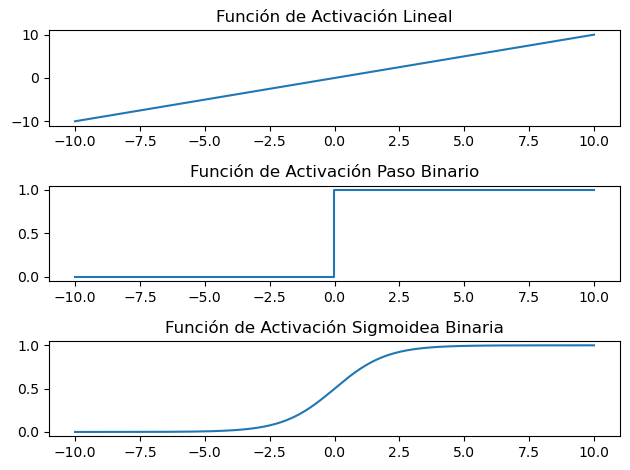

In [78]:
def lineal(x):
    return x

def sigmodial_binaria(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 400)


plt.subplot(3, 1, 1)
plt.plot(x, lineal(x), label='Lineal')
plt.title('Función de Activación Lineal')

plt.subplot(3, 1, 2)
plt.step(x, paso_binario(x), label='Paso Binario')
plt.title('Función de Activación Paso Binario')

plt.subplot(3, 1, 3)
plt.plot(x, sigmodial_binaria(x), label='Sigmoidea Binaria')
plt.title('Función de Activación Sigmoidea Binaria')


plt.tight_layout()
plt.show()


Veremos un ejemplo de como realizar regresión con una sola red neuronal

In [79]:
from sklearn.datasets import fetch_california_housing

# Cargar el conjunto de datos de viviendas de California
data = fetch_california_housing()
X = data.data
y = data.target

# Recuerda normalizar!
# Recuerda limpiar los datos

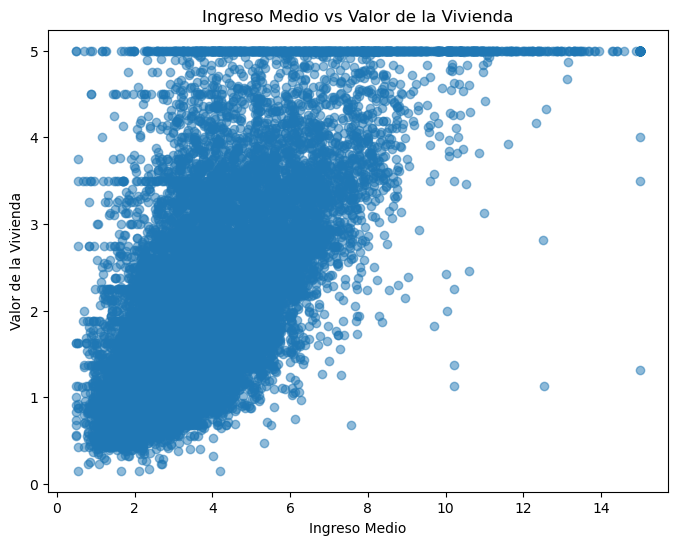

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, alpha=0.5)
plt.title('Ingreso Medio vs Valor de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor de la Vivienda')
plt.show()


In [98]:
longitud_entrada = 1
pesos = np.random.rand(longitud_entrada)
bias = np.random.rand()
funcion_activacion = lineal
#funcion_activacion =sigmodial_binaria
epochs = 10
tasa_aprendizaje = 0.0001
print(pesos,bias,sep="\n")

[0.75221413]
0.8387679097140247


In [99]:
for _ in range(epochs):
  for entrada, salida_esperada in zip(X[:10, 0], y[:10]):
    salida = calcular_neurona(entrada, pesos, bias, funcion_activacion)
    error = salida_esperada - salida
    pesos = pesos + error*entrada*tasa_aprendizaje
    bias = bias + error*tasa_aprendizaje

  print(pesos,bias)

[0.7428823] [0.83734342]
[0.73382925] [0.8359662]
[0.72504661] [0.83463485]
[0.7165263] [0.83334799]
[0.70826045] [0.83210428]
[0.70024144] [0.83090243]
[0.69246188] [0.82974118]
[0.68491459] [0.82861932]
[0.67759261] [0.82753567]
[0.6704892] [0.82648908]


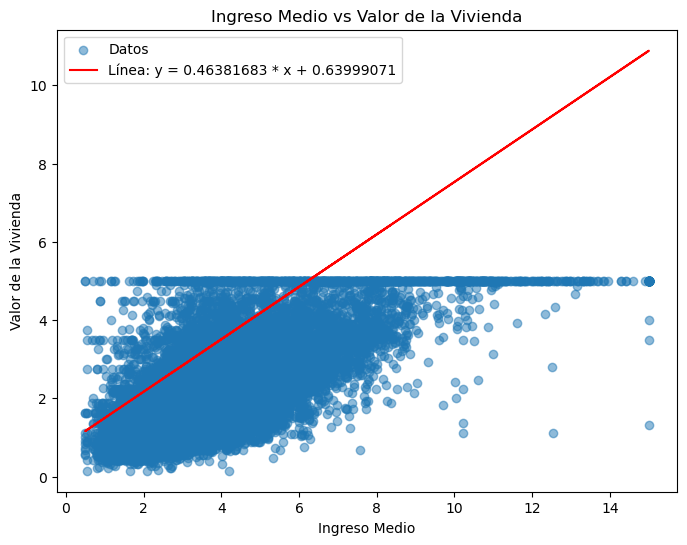

In [100]:
def linea(x,peso,bias):
    return peso* x + bias

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], y, alpha=0.5, label='Datos')
plt.plot(X[:, 0], linea(X[:, 0],pesos,bias), color='red', label='Línea: y = 0.46381683 * x + 0.63999071')
plt.title('Ingreso Medio vs Valor de la Vivienda')
plt.xlabel('Ingreso Medio')
plt.ylabel('Valor de la Vivienda')
plt.legend()
plt.show()

**Discusión**

- ¿Es la aproximación adecuada? ¿Por qué?      
Maso menos, puede mejorar
- ¿En dónde radica la limitación?      
Falta realizar limpieza de datos, y outliers (arriba de 10 en ingreso medio)


# Otras implementaciones




## ChatGPT

ChatGPT da una implementación muy bonita del perceptrón que vale la pena revisar a detalle

In [17]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    # Paso hacia adelante
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return step_function(weighted_sum)

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += learning_rate * error * X[i]
                self.bias += learning_rate * error



## Scikit Learn

Así también, scikit learn ofrece una implementación del perceptrón. Aunque mucho mas avanzado y con muchas cosas preconstruidas

Podemos ver un ejercicio de la implementación a continuación


In [101]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

In [102]:
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0) 
# tol = tolerancia
clf.fit(X, y)
clf.score(X, y)

0.9393433500278241

In [103]:
clf.coef_
# 64 pixeles por imagen
# 10 posibles digitos

array([[   0.,  -12.,  -38.,   17.,  -21., -109.,  -56.,   -2.,    0.,
         -37.,  -11.,    4.,   51.,   79.,  -30.,   -5.,    0.,   -7.,
          65.,  -31., -101.,  116.,    5.,    0.,    0.,   16.,   18.,
         -58., -178.,    7.,   17.,    0.,    0.,   41.,   53.,  -74.,
        -203.,  -40.,   -8.,    0.,   -3.,  -15.,   57.,  -93.,  -83.,
           7.,   21.,    0.,    0.,  -33.,   14.,   -7.,   19.,  -23.,
         -57.,  -12.,    0.,  -13.,  -66.,   15.,  -48.,  -58.,  -53.,
         -14.],
       [   0.,  -32.,   -2.,   86., -386.,  137.,  -65.,  -20.,   -1.,
        -230., -234., -171.,    9.,   57., -158.,  -11.,   12.,  103.,
          29.,  356.,  258., -111.,  -35.,   -1.,    2.,  -30.,    3.,
         126.,  -27.,   70., -166.,    0.,    0., -146.,   44.,  -50.,
          74.,   10., -204.,    0.,    0., -224.,  -78.,   15.,    2.,
        -140., -216.,   -3.,   -4.,  -89.,  -29.,   64.,   61.,  -20.,
        -146.,   82.,   -1.,  -35., -143.,  -21.,   20.,   74

In [105]:
## BIAS
clf.intercept_


array([ -5., -52.,  -7., -23.,   4., -12., -17.,  -4., -69., -35.])

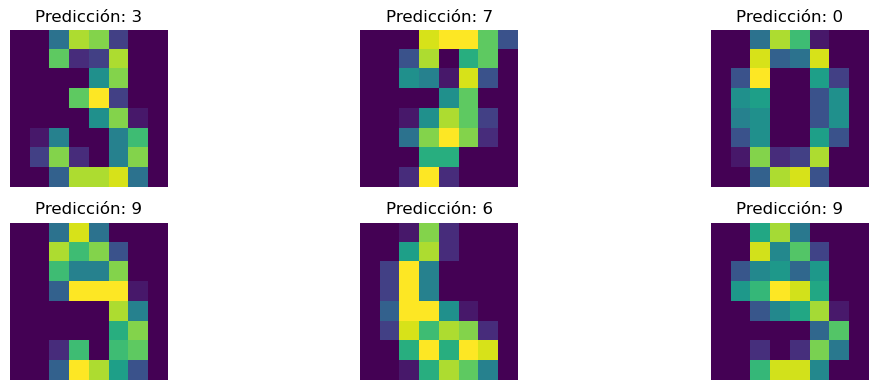

In [109]:
# Visualizar los dígitos y las predicciones
plt.figure(figsize=(12, 4))
for i, idx in enumerate(np.random.choice(len(X), size=6, replace=False)):
    plt.subplot(2, 3, i + 1)
    #plt.imshow(X[idx].reshape(8, 8), cmap='gray')
    plt.imshow(X[idx].reshape(8, 8), cmap='viridis')
    plt.title(f'Predicción: {clf.predict([X[idx]])[0]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Tensorflow



In [ ]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/524.2 MB 62.3 kB/s eta 2:19:23

In [110]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [26]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense(units=1, activation='hard_sigmoid', input_shape=(2,)))

modelo.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
modelo.fit(x, y, epochs=10_000)

Streaming output truncated to the last 5000 lines.
Epoch 60/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2771
Epoch 61/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2770
Epoch 62/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2768
Epoch 63/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2767
Epoch 64/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2766
Epoch 65/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2765
Epoch 66/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2764
Epoch 67/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.2762
Epoch 68/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2761
Epoch 69/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2760
Epoch 70/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.2759
Epoch 71/5000
1/1 [==============================] - 0s 8ms/step - lo

In [28]:
print(modelo.predict(x))

1/1 [==============================] - 0s 331ms/step
[[0.        ]
 [0.2557876 ]
 [0.1706152 ]
 [0.73421735]]
